## Spliting Data into train and test split

In [1]:
# Import necessary Libraries
# EDA analysis
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

# data_processing
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Load the clean data
df = pd.read_csv('cleaned_training_data.csv',index_col=0)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4.189655,8450,7,5,196.0,706.0,0.0,150.0,856.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.247699
2,20,4.394449,9600,6,8,0.0,978.0,0.0,284.0,1262.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.109016
3,60,4.234107,11250,7,5,162.0,486.0,0.0,434.0,920.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.317171
4,70,4.110874,9550,7,5,0.0,216.0,0.0,540.0,756.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.849405
5,60,4.442651,14260,8,5,350.0,655.0,0.0,490.0,1145.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.429220


In [3]:
X = df.drop(columns=['SalePrice'])  # Features
y = df['SalePrice']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Build Baseline models

The models that will be used in this case are: `LinearRegeression model`, `DecisionTree Regressor`, `RandomForest Regressor` and `XGBoost`. 

### 1. `LinearRegressor`

In [4]:
# create a function for cross validation
def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    print(f'RMSE Scores_{model}: {-scores}')
    print(f'Average RMSE_{model}: {-scores.mean():.2f}')


In [5]:
def evaluate_model(model):
  y_preds = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_preds)
  mse = mean_squared_error(y_test, y_preds)

  print(f'MAE_{model}: {mae:.2f}')
  print(f'RMSE_{model}: {mse:.2f}')



In [6]:
#build the model and train
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
cross_validate_model(linear_model, X_train, y_train)

# Evaluate the model
evaluate_model(linear_model)



RMSE Scores_LinearRegression(): [0.13758584 0.26914468 0.22301958 0.16669524 0.22745313]
Average RMSE_LinearRegression(): 0.20
MAE_LinearRegression(): 0.10
RMSE_LinearRegression(): 0.05


In [7]:
# plot residuals
# sns.residplot(x=y_test, y=y_preds, lowess=True, color="g")

This `LineaRegression model` Has a generally low mean squared and mean average error indicating it performs well with default parameters however the residual plot is slighty curved indicating it may not be a good fit. 

### 2. Decision Tree Regressor


In [8]:
# Build and fit the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
cross_validate_model(dt_model,X_train,y_train)

# Evaluate model
evaluate_model(dt_model)


RMSE Scores_DecisionTreeRegressor(random_state=42): [0.22420025 0.23450175 0.21489366 0.21616188 0.16820327]
Average RMSE_DecisionTreeRegressor(random_state=42): 0.21
MAE_DecisionTreeRegressor(random_state=42): 0.15
RMSE_DecisionTreeRegressor(random_state=42): 0.05


The `DecisionTreeRegressor` performs almost the same as the linear model. 

### 3. `RandomForest Regressor`

In [9]:
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)
cross_validate_model(rf_model,X_train,y_train)

#evaluate model
evaluate_model(rf_model)

RMSE Scores_RandomForestRegressor(random_state=42): [0.13017795 0.16284026 0.17040259 0.13198833 0.12052371]
Average RMSE_RandomForestRegressor(random_state=42): 0.14
MAE_RandomForestRegressor(random_state=42): 0.10
RMSE_RandomForestRegressor(random_state=42): 0.02


The `RandomForestRegressor` performed better than the other two models however it took a longer time to fir the data.

### 4. `XGBoost`

In [10]:
xgb_model = XGBRegressor(n_estimators=100,learning_rate=0.1,random_state=42)
xgb_model.fit(X_train,y_train)
cross_validate_model(xgb_model,X_train,y_train)

#evaluate model
evaluate_model(xgb_model)

RMSE Scores_XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...): [0.14286495 0.15259021 0.1542729  0.13580171 0.11755364]
Average RMSE_XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early

In [11]:
# Compare the models performance:
models = [linear_model, dt_model, rf_model, xgb_model]
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    print(f'Average RMSE_{model}: {-scores.mean():.2f}')


Average RMSE_LinearRegression(): 0.20
Average RMSE_DecisionTreeRegressor(random_state=42): 0.21
Average RMSE_RandomForestRegressor(random_state=42): 0.14
Average RMSE_XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...): 0.14


So far the `RandomForestRegressor` and `XGBoost` perform the best. however this is to be confirmed after hyperparameter tuning, a different decision may be made. 

## Hyperparameter Tuning

In [12]:
rf_params = {
  'n_estimators' : [100,200,300],
  'max_depth' : [None,10,20,30],
  'min_samples_split' : [2,5,10],
  'min_samples_leaf' : [1,2,4],
  'max_features' : ['auto','sqrt'],
}

# Randomized search
rf_model = RandomForestRegressor(random_state=42)
rf_search = RandomizedSearchCV(
  rf_model,
  param_distributions=rf_params,
  n_iter=10,
  cv=5,
  scoring='neg_root_mean_squared_error',
  random_state=42,
  n_jobs=-1
)
rf_search.fit(X_train,y_train)

# Best parameters
print("The best parameters are: ", rf_search.best_params_)

c:\Users\CINDY\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\CINDY\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\CINDY\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\CINDY\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\CINDY\anaconda3\Lib\site-packages\

The best parameters are:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [13]:
# Train with the best parameters
best_rf_model = rf_search.best_estimator_
rf_rmse = rf_search.best_score_
print(f'RMSE: {-rf_rmse:.2f}')

RMSE: 0.14


In [14]:
xgb_params = {
  'n_estimators' : [100,200,500],
  'learning_rate' : [0.01,0.05,0.1,0.2],
  'max_depth' : [3,5,7,10],
  'subsample' : [0.6,0.8,1.0],
  'colsample_bytree' : [0.6,0.8,1.0],
  'gamma' : [0,1,5],
}

# Randomized search
xgb_model = XGBRegressor(random_state=42)
xgb_search = RandomizedSearchCV(
  xgb_model,
  param_distributions=xgb_params,
  n_iter=20,
  cv=5,
  scoring='neg_root_mean_squared_error',
  random_state=42,
  n_jobs=-1,
)
xgb_search.fit(X_train,y_train)

# Best parameters
print("The best parameters are: ", xgb_search.best_params_)

The best parameters are:  {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}


In [15]:
# Train with the best parameters
best_xgb = xgb_search.best_estimator_
xgb_rmse = xgb_search.best_score_

print(f'RMSE: {-xgb_rmse:.2f}')

RMSE: 0.13


The best overall model with the **lowest root mean squared error** is `XGBoost`

In [16]:
final_model = best_xgb
final_model.fit(X_train,y_train)

# evaluate on test set
y_pred = final_model.predict(X_test)

# calculate rmse
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Final XGBoost Test RMSE: {rmse:.2f}")

Final XGBoost Test RMSE: 0.14


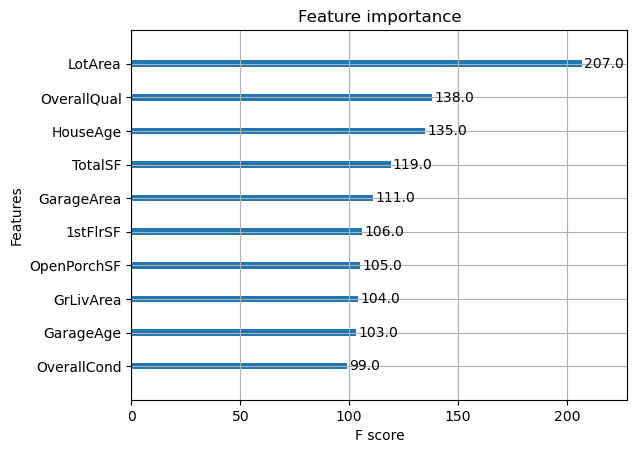

In [17]:
# view the top 10 most important features
xgb.plot_importance(final_model, max_num_features=10)
plt.show()

In [18]:
# predict prices for test data 

test_data = pd.read_csv('cleaned_testing_data', index_col=0)
test_data.head()

In [ ]:
# predict 
predicted_saleprice = final_model.predict(test_data)

predicted_saleprice


array([11.853293, 11.896862, 11.700885, ..., 12.0356  , 11.74804 ,
       12.332191], dtype=float32)

In [ ]:
predicted_saleprice = np.expm1(predicted_saleprice)
predicted_saleprice

,SalePrice
0,140545.468750
1,146804.234375
2,120677.445312
3,157265.687500
4,186944.906250
...,...
1454,84747.679688
1455,81596.203125
1456,168652.187500
1457,126504.390625


In [ ]:
# Create a dataframe for the predicted sale price and convert to normal values
predicted_saleprice = pd.DataFrame(predicted_saleprice, columns=['SalePrice'])

predicted_saleprice

,SalePrice
0,140545.468750
1,146804.234375
2,120677.445312
3,157265.687500
4,186944.906250
...,...
1454,84747.679688
1455,81596.203125
1456,168652.187500
1457,126504.390625


In [ ]:
# Convert to csv
predicted_saleprice.to_csv('final_submission.csv')

In [ ]:
# save the model for future use
import joblib

joblib.dump(best_xgb, "xgboost_house_price_model.pkl")


NameError: name 'best_xgb' is not defined